# Entregável 1 - visão computacional

Nome: **William Augusto Reis da Silva**

Engenharia de Computação

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

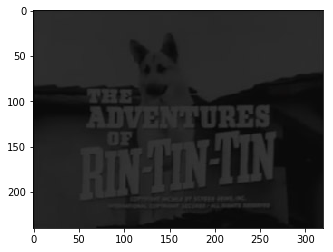

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

plt.imshow(rintin)

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
# Conversão para cinza
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

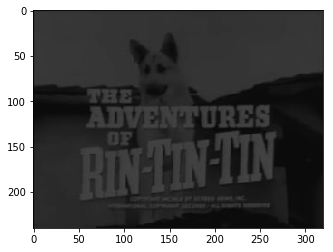

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

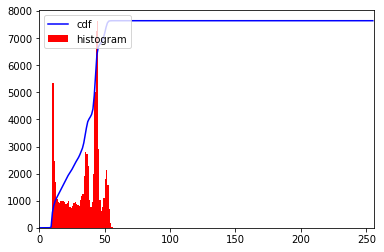

In [8]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

*1. O histograma não aproveita bem as faixas de cores, tendo em vista que se concentra no início e não percorre até o 255.*

2. Para fazer isso, irei criar uma função f(x), que é uma reta e transforma os valores para dentro dela.

Para isso, precisamos descobrir qual o ponto máximo e mínimo, para poder aplicar uma reta entre eles.

In [9]:
maximo = max(cdf_normalized)
minimo = 0

# Com isso, temos os pontos (0,0) e (255, maximo)

In [10]:
def f(x):
    m = maximo/255
    n = minimo
    y = m*x + n
    return y

new = []
for i in range(255):
    new.append(f(i))
    
myarray = np.asarray(new)

In [11]:
saida = rintin_gray.copy()

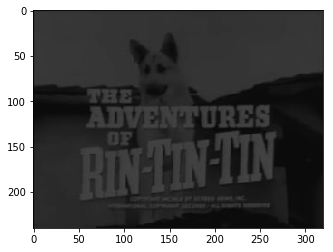

In [12]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


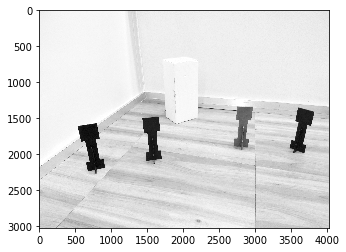

In [13]:
# Pegando a imagem
sala = cv2.imread("cena_canto_sala.jpg")

# Transformando a imagem em RGB
sala_rgb = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)

# Separando o vermelho
sala_red = sala_rgb[:,:,0]
plt.imshow(sala_red, cmap="Greys_r")

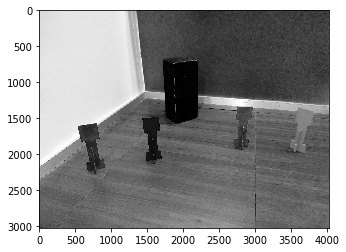

In [14]:
# Separando a azul
sala_blue = sala_rgb[:,:,2]
plt.imshow(sala_blue, cmap="Greys_r")

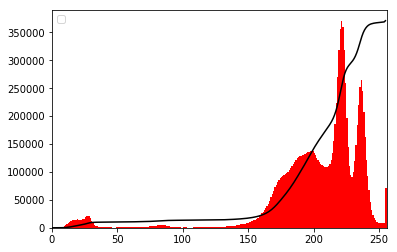

In [19]:
# Vermelho
hist, bins = np.histogram(sala_red.flatten(),256,[0,256])
cdf_red = hist.cumsum()
cdf_normalized = cdf_red * hist.max()/ cdf_red.max()

plt.plot(cdf_normalized, color = 'black')
plt.hist(sala_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend('cdf','histogram', loc = 'upper left')
plt.show()

(array([1.43586e+05, 5.61300e+04, 5.43010e+04, 4.46110e+04, 3.19490e+04,
        2.04170e+04, 1.17670e+04, 6.94100e+03, 4.32500e+03, 3.23600e+03,
        3.17900e+03, 3.91800e+03, 4.86900e+03, 5.66400e+03, 6.77100e+03,
        7.71400e+03, 9.34200e+03, 1.14520e+04, 1.29920e+04, 1.36150e+04,
        1.27180e+04, 1.04380e+04, 7.55200e+03, 5.51700e+03, 4.61700e+03,
        4.88800e+03, 5.53000e+03, 6.62300e+03, 7.73600e+03, 8.75100e+03,
        9.93000e+03, 1.11250e+04, 1.23620e+04, 1.41840e+04, 1.74710e+04,
        2.11590e+04, 2.69470e+04, 3.46020e+04, 4.39350e+04, 5.63990e+04,
        6.99230e+04, 8.50120e+04, 1.01775e+05, 1.19339e+05, 1.37511e+05,
        1.54618e+05, 1.69215e+05, 1.78610e+05, 1.84046e+05, 1.81671e+05,
        1.73868e+05, 1.62021e+05, 1.46977e+05, 1.33565e+05, 1.20525e+05,
        1.10573e+05, 1.02497e+05, 9.67880e+04, 9.25890e+04, 8.99480e+04,
        8.82680e+04, 8.69670e+04, 8.74400e+04, 8.72770e+04, 8.65660e+04,
        8.62260e+04, 8.74490e+04, 8.95640e+04, 9.31

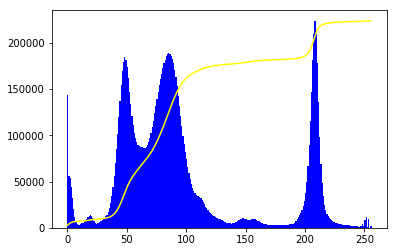

In [20]:
# Azul
hist2, bins2 = np.histogram(sala_blue.flatten(), 256, [0,256])
cdf_blue = hist2.cumsum()
cdf_normalized2 = cdf_blue * hist2.max()/cdf_blue.max()

plt.plot(cdf_normalized2, color='yellow')
plt.hist(sala_blue.flatten(),256,[0,256], color= 'b')

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [53]:
hall = cv2.imread("hall_box_battery_atividade3.png")
#plt.imshow(hall)

In [86]:
# Transformando para RGB
hall_rgb = cv2.cvtColor(hall, cv2.COLOR_BGR2GRAY)
#plt.imshow(hall_rgb, cmap="Greys_r", vmin=0, vmax=255)
saida_deste = hall_rgb.copy()

saida_deste_new = []

i = 1
j = 1
for linha in saida_deste:
    for element in linha:        
        linha[i] = linha[i+1] - linha[i-1]
        i += 1
        saida_deste_new.append(linha)
    


C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


IndexError: index 1024 is out of bounds for axis 0 with size 1024

In [73]:
hall_gray = cv2.cvtColor(hall, cv2.COLOR_RGB2GRAY)

copy = hall_gray.copy()


for i in range(hall_gray.shape[0]):
    for j in range(hall_gray.shape[1]):
        copy[i][j] = 0

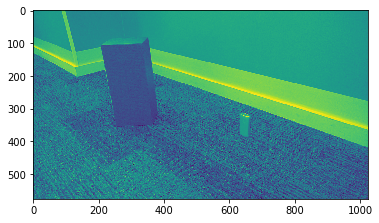

In [74]:
plt.imshow(hall_gray)